In [1]:
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("/content/data.zip", 'r')
zip_ref.extractall("data/")
zip_ref.close()

In [2]:
train_path = '/content/data/train'
test_path = '/content/data/test'

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout

In [4]:
# # Buat generator untuk augmentasi data train
# train_datagen = ImageDataGenerator(
#     # rescale=1.0 / 255,
#     rotation_range=30,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='reflect',
#     brightness_range=[0.8, 1.2],
# )

# test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# train_generator = train_datagen.flow_from_directory(
#     train_path,
#     target_size=(224, 224),
#     batch_size=30,
#     color_mode = 'rgb',
#     class_mode='categorical'
# )

# validation_generator = test_datagen.flow_from_directory(
#     test_path,
#     target_size=(224, 224),
#     batch_size=30,
#     color_mode = 'rgb',
#     class_mode='categorical'
# )


train_datagen = ImageDataGenerator(
    shear_range=0.2,
    rotation_range=30,
    fill_mode='reflect',
    zoom_range=0.2,
    brightness_range=[0.5, 0.9],
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=30,
    color_mode='rgb'
)

validation_generator = validation_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=30,
    color_mode='rgb'
)

Found 1080 images belonging to 15 classes.
Found 270 images belonging to 15 classes.


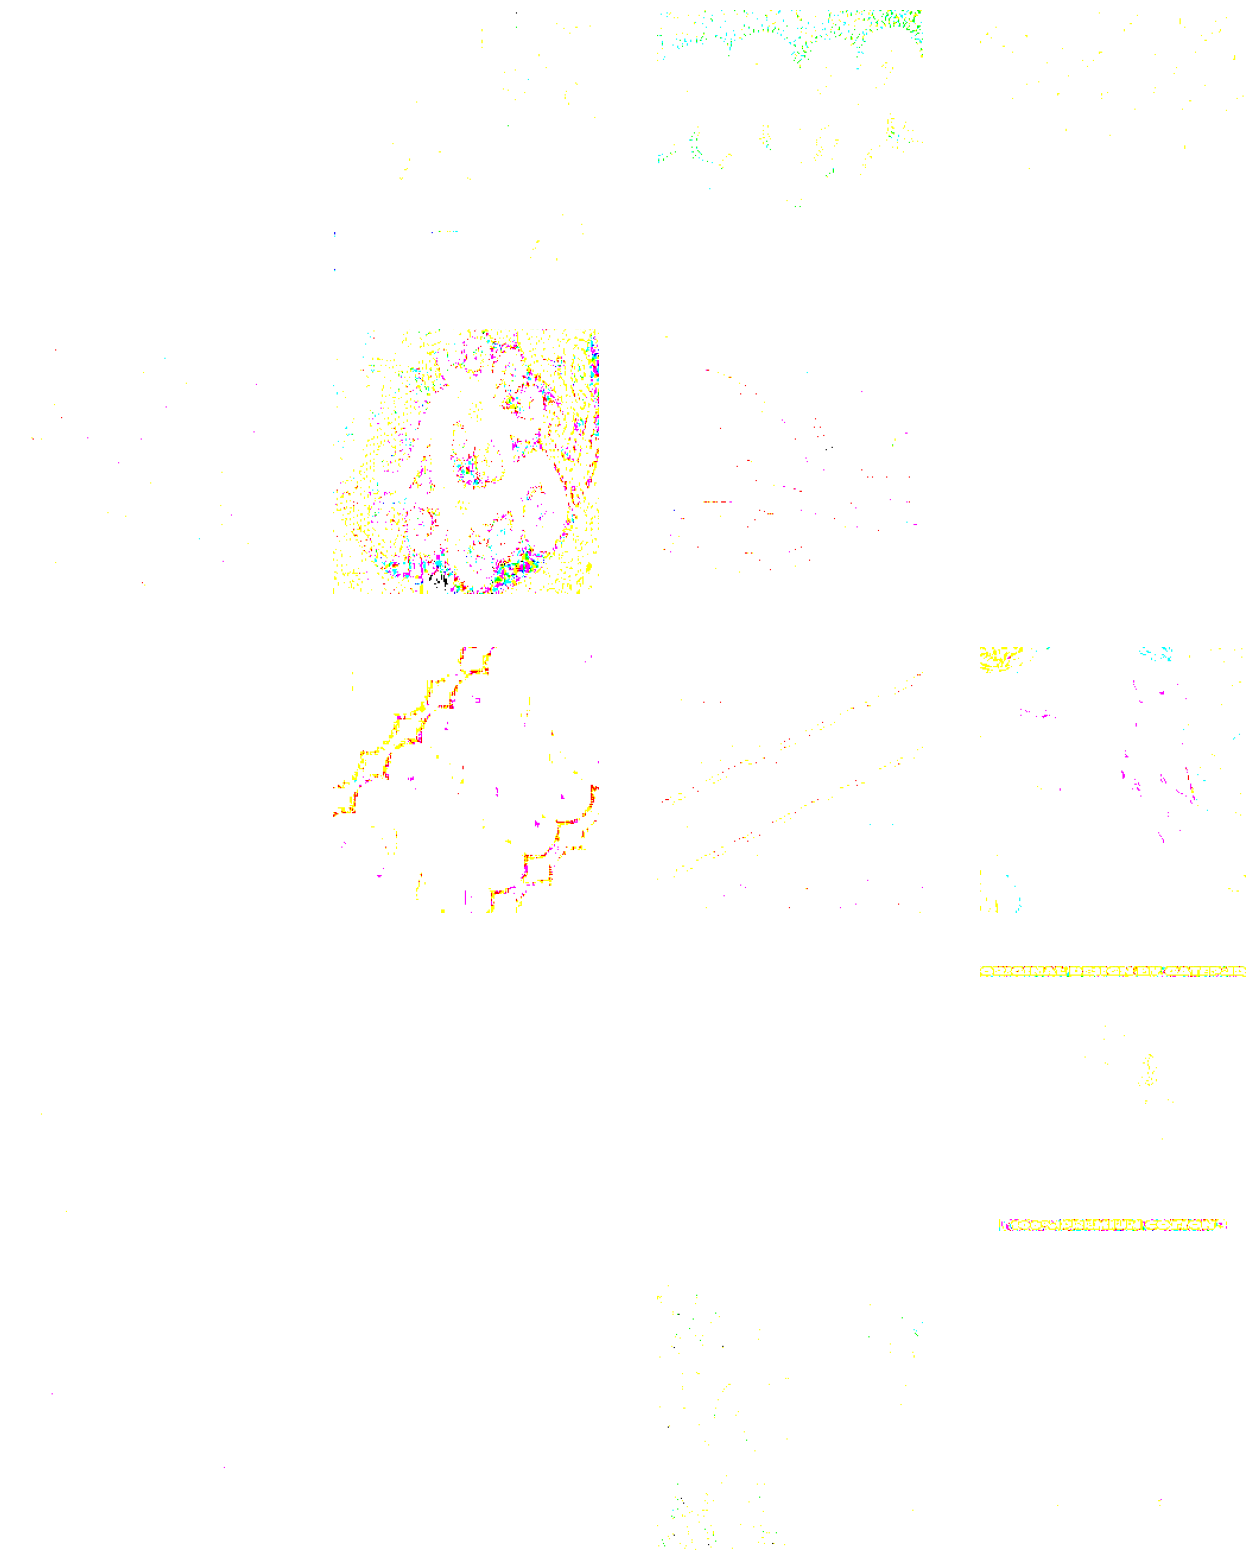

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 20))

for i in range(20):
    img, label = validation_generator.next()
    plt.subplot(5, 4, i+1)
    plt.imshow(img[0])
    plt.axis('off')
    
plt.show()

In [6]:
all_motif = train_generator.class_indices
x = 1
for motiif in all_motif:
  print(x,'.',motiif)
  x = x+1

1 . Batik Bali
2 . Batik Betawi
3 . Batik Cendrawasih
4 . Batik Dayak
5 . Batik Geblek Renteng
6 . Batik Ikat Celup
7 . Batik Insang
8 . Batik Kawung
9 . Batik Lasem
10 . Batik Megamendung
11 . Batik Pala
12 . Batik Parang
13 . Batik Poleng
14 . Batik Sekar Jagad
15 . Batik Tambal


In [7]:
print(len(train_generator.class_indices))

15


In [8]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    pooling='avg'
)

base_model.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [9]:
print(train_generator.samples)
print(validation_generator.samples)

1080
270


In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import TensorBoard

model = Sequential([
    base_model,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(15, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

tensorboard_callback = TensorBoard(log_dir='logs')

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // 30,
    validation_steps=validation_generator.samples // 30,
    shuffle = True,
    epochs=15,
    callbacks=[tensorboard_callback]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                975       
                                                                 
Total params: 4,132,530
Trainable params: 82,959
Non-trainable params: 4,049,571
_________________________________________________________________


Epoch 1/15
36/36 [==============================] - 155s 4s/step - loss: 2.3029 - accuracy: 0.2806 - val_loss: 1.7058 - val_accuracy: 0.5259
Epoch 2/15
36/36 [==============================] - 137s 4s/step - loss: 1.5468 - accuracy: 0.5278 - val_loss: 1.2302 - val_accuracy: 0.6519
Epoch 3/15
36/36 [==============================] - 111s 3s/step - loss: 1.1842 - accuracy: 0.6519 - val_loss: 1.0314 - val_accuracy: 0.6815
Epoch 4/15
36/36 [==============================] - 111s 3s/step - loss: 0.9912 - accuracy: 0.6944 - val_loss: 0.9287 - val_accuracy: 0.6889
Epoch 5/15
36/36 [==============================] - 116s 3s/step - loss: 0.8685 - accuracy: 0.7556 - val_loss: 0.8708 - val_accuracy: 0.7222
Epoch 6/15
36/36 [==============================] - 132s 4s/step - loss: 0.7680 - accuracy: 0.7583 - val_loss: 0.8766 - val_accuracy: 0.7481
Epoch 7/15
36/36 [==============================] - 110s 3s/step - loss: 0.7144 - accuracy: 0.7889 - val_loss: 0.8282 - val_accuracy: 0.7556
Epoch 8/15
36

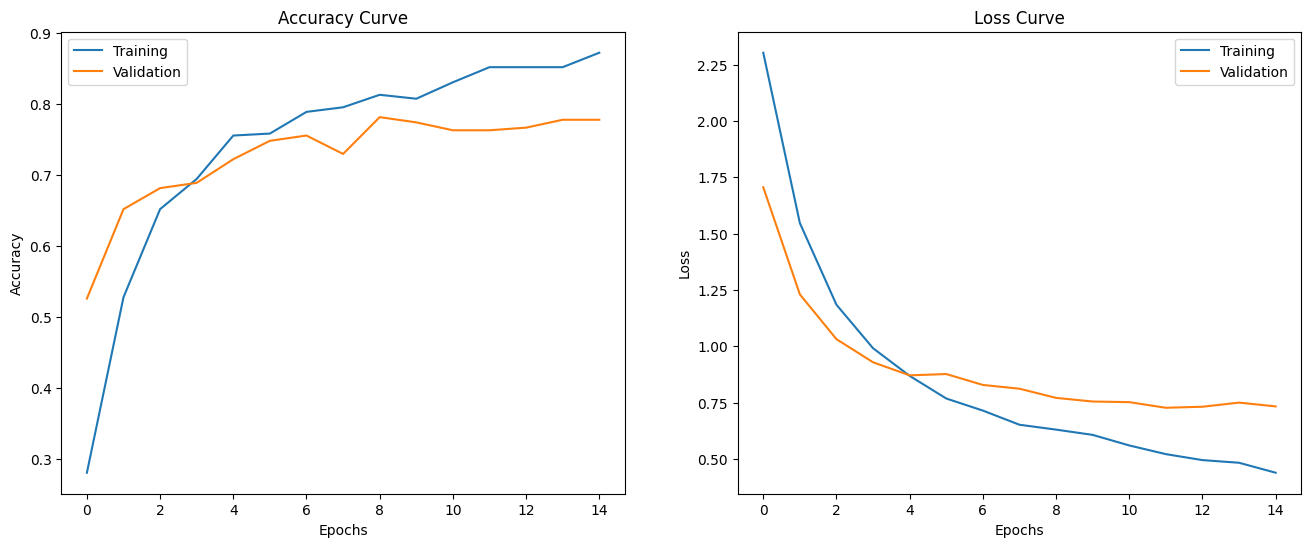

In [11]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title('Accuracy Curve')
plt.plot(train_acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.title('Loss Curve')
plt.plot(train_loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [12]:
# Evaluasi Model
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100:.2f}%")

9/9 [==============================] - 19s 2s/step - loss: 0.7330 - accuracy: 0.7778
Test Accuracy: 77.78%


In [13]:
def predict_motif(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    motif_index = tf.argmax(predictions, axis=1).numpy()[0]
    motif_label = list(validation_generator.class_indices.keys())[motif_index]

    return motif_label

In [69]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
def predict_motif(image_path,batik_type):
  motive = batik_type
  images_list = os.listdir(os.path.join(test_path, motive))    

  correct_count = 0
  # for idx, image in enumerate(images_list):
  img = load_img(image_path, target_size=(224, 224))
  img_array = img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  motives_list = list(train_generator.class_indices.keys())
  prediction = model(img_array)
  pred_idx = np.argmax(prediction)
  pred_motive = motives_list[pred_idx]
  pred_confidence = prediction[0][pred_idx] * 100
  print(pred_motive)
  print('\n\n')
  return pred_motive


def count_correct_predictions(test_folder):
    batik_types = [
        "Batik Bali",
        "Batik Betawi",
        "Batik Cendrawasih",
        "Batik Dayak",
        "Batik Geblek Renteng",
        "Batik Ikat Celup",
        "Batik Insang",
        "Batik Kawung",
        "Batik Lasem",
        "Batik Megamendung",
        "Batik Pala",
        "Batik Parang",
        "Batik Poleng",
        "Batik Sekar Jagad",
        "Batik Tambal"
    ]

    correct_predictions_per_folder = {}

    for batik_type in batik_types:
        folder_path = os.path.join(test_folder, batik_type)
        if os.path.isdir(folder_path):
            correct_predictions = 0
            total_images = 0
            for file in os.listdir(folder_path):
                if file.endswith(".jpg") or file.endswith(".png"):
                    image_path = os.path.join(folder_path, file)
                    print("Seharusnya ", batik_type,'Dan Model Machine Learning memprediksi : ')
                    if batik_type == predict_motif(image_path,batik_type):
                        correct_predictions += 1
                    total_images += 1
            correct_predictions_per_folder[batik_type] = (correct_predictions, total_images)

    return correct_predictions_per_folder

# Contoh penggunaan fungsi
test_folder = "/content/data/test"
correct_predictions_per_folder = count_correct_predictions(test_folder)

for batik_type, (correct_predictions, total_images) in correct_predictions_per_folder.items():
    print(f"Subfolder: {batik_type}")
    print(f"Total Correct Predictions: {correct_predictions}")
    print(f"Total Images: {total_images}")
    print("------------")


Seharusnya  Batik Bali Dan Model Machine Learning memprediksi : 
Batik Bali



Seharusnya  Batik Bali Dan Model Machine Learning memprediksi : 
Batik Bali



Seharusnya  Batik Bali Dan Model Machine Learning memprediksi : 
Batik Cendrawasih



Seharusnya  Batik Bali Dan Model Machine Learning memprediksi : 
Batik Bali



Seharusnya  Batik Bali Dan Model Machine Learning memprediksi : 
Batik Lasem



Seharusnya  Batik Bali Dan Model Machine Learning memprediksi : 
Batik Cendrawasih



Seharusnya  Batik Bali Dan Model Machine Learning memprediksi : 
Batik Poleng



Seharusnya  Batik Bali Dan Model Machine Learning memprediksi : 
Batik Lasem



Seharusnya  Batik Bali Dan Model Machine Learning memprediksi : 
Batik Bali



Seharusnya  Batik Bali Dan Model Machine Learning memprediksi : 
Batik Cendrawasih



Seharusnya  Batik Bali Dan Model Machine Learning memprediksi : 
Batik Bali



Seharusnya  Batik Bali Dan Model Machine Learning memprediksi : 
Batik Bali



Seharusnya  Batik Bali Dan 

In [14]:
def predict_motif2(image_path):  

  img = load_img(image_path, target_size=(224, 224))
  img_array = img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  motives_list = list(train_generator.class_indices.keys())
  prediction = model(img_array)
  pred_idx = np.argmax(prediction)
  pred_motive = motives_list[pred_idx]
  pred_confidence = prediction[0][pred_idx] * 100
  print(pred_motive)
  print('\n\n')
  return pred_motive

In [17]:
from google.colab import files
from IPython.display import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [21]:
gambar = files.upload()
image_path = next(iter(gambar))
print(predict_motif2(image_path))

Saving IMG20230530195512.jpg to IMG20230530195512.jpg
Batik Lasem



Batik Lasem


adam optimizer mendapatkan acc 77.8 , saat test image betul 210/270</br>
sgd optimizer mendapatkan acc 72, saat test image betul 195/270</br>
RMSprop overfit bgt